In [53]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score


In [54]:
# Loading the dataset
data = pd.read_csv(r'C:\Users\Samuel\Documents\Customer Churn Prediction Work\Amazon Dataset\AmazonProducts.csv')
data.head(10)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
5,5,Voltas 1.4 Ton 3 Star Inverter Split AC(Copper...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41TuyxwZ9m...,https://www.amazon.in/Voltas-Adjustable-173V-V...,4.0,"1,666","₹31,990","₹70,990"
6,6,Lloyd 1.0 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31IXlxIPsO...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"1,097","₹29,999","₹49,990"
7,7,Lloyd 1.5 Ton 5 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31IXlxIPsO...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.3,"1,494","₹39,990","₹67,990"
8,8,Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51sTXvsanQ...,https://www.amazon.in/Carrier-Flexicool-Invert...,4.1,674,"₹30,990","₹58,190"
9,9,"Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51WQ3nWF0v...,https://www.amazon.in/Voltas-Inverter-Split-Co...,4.0,801,"₹37,999","₹73,990"


In [55]:
# Replacing the missing value with nan
data = data.apply(lambda x: x.replace('?',np.nan)) 
data.head(5)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [56]:
# Number of instances, number of attributes 
data.shape


(551585, 10)

In [57]:
data.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [58]:
data.info

<bound method DataFrame.info of         Unnamed: 0                                               name  \
0                0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...   
1                1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...   
2                2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...   
3                3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...   
4                4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...   
...            ...                                                ...   
551580        1099                Adidas Regular Fit Men's Track Tops   
551581        1100          Redwolf Noice Toit Smort - Hoodie (Black)   
551582        1101     Redwolf Schrute Farms B&B - Hoodie (Navy Blue)   
551583        1102                                    Puma Men Shorts   
551584        1103  Mothercare Printed Cotton Elastane Girls Infan...   

           main_category      sub_category  \
0             appliances  Air Conditioners   

In [59]:
# Missing value per attribute
data.isnull().sum()


Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [60]:
data.describe(include='all')

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,551585.000000,551585,551585,551585,551585,551585,375791,375791,490422,533772
unique,NaN,396210,20,112,462414,551585,49,8342,27511,23170
top,NaN,Zeya Yellow Gold Ring,accessories,Shirts,https://m.media-amazon.com/images/I/51uEPldT42...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.0,1,₹499,₹999
freq,NaN,718,116141,19200,3044,1,36609,39816,18248,48774
mean,7006.200471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5740.835523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1550.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5933.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,11482.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Droping the duplicate instance
data.drop_duplicates() 

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


In [62]:
# Maintaining only the instances with at least 70% non-NAN values.  
#data = data.dropna(thresh = 7) 
#def keep_non_nan_instances(data, threshold = 0.8):
#    non_nan_count = np.count_nonzero(~np.isnan(data))
#total_count = data.size
#keep_mask = (non_nan_count/total_count) >= threshold
#return data[keep_mask]
#data = keep_non_nan_instances(data, threshold = 0.8)
data = data.dropna()
data.shape

(340680, 10)

In [63]:
# maintaining only attributes with at least 125 non-NAN values, i.e 80%.
#data = data.dropna(axis=1, thresh=125) 
#print(data.shape)
print(data.columns)

data.isnull().sum() 

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')


Unnamed: 0        0
name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [64]:
#def create_new_column(data, discount_price, actual_price, operation = '/'):
#price_ratio = data['discount_price']/data['actual_price'] * 100
#data['percentage_discount'] = price_ratio * 100
data.dtypes

Unnamed: 0         int64
name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

In [65]:
# Creating a new column    
#percentage_discount = np.empty(data.shape[0])
#for i in range(data.shape[0]):
 #   if operation == '/':
 #       percentage_discount[i] = data[i][discount_price] / data[i][actual_price]
#return percentage_discount
data = data.drop(['Unnamed: 0', 'link', 'image'], axis = 'columns')

In [66]:
data.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790"


In [67]:
data['discount_price'] = data['discount_price'].str.replace(',', '')
data['discount_price'] = data['discount_price'].str.replace('₹', '')


In [68]:
data.head(3)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",32999,"₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948",46490,"₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206",34490,"₹61,990"


In [69]:
data['actual_price'] = data['actual_price'].str.replace(',', '')
data['actual_price'] = data['actual_price'].str.replace('₹', '')
data.head(3)


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",32999,58990
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948",46490,75990
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206",34490,61990


In [70]:
data['no_of_ratings'] = data['no_of_ratings'].str.replace(',', '')

In [71]:
data.columns

data.isnull().sum() 

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [72]:
data.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255,32999,58990
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948,46490,75990
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206,34490,61990
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,37990,68990
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,34490,67790


In [73]:
# converting the data type

data = data._convert(numeric = True)   
data.describe(include='all')

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
count,340680,340680,340680,334963.000000,334963.000000,3.406800e+05,3.406800e+05
unique,242652,20,112,NaN,NaN,NaN,NaN
top,Red Tape Men's Walking Shoes,accessories,Clothing,NaN,NaN,NaN,NaN
freq,243,64690,16941,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.814368,853.864540,1.791600e+03,3.253900e+04
std,NaN,NaN,NaN,0.754169,8890.977903,6.428444e+03,1.696173e+07
min,NaN,NaN,NaN,1.000000,1.000000,8.000000e+00,1.000000e+01
25%,NaN,NaN,NaN,3.500000,4.000000,3.590000e+02,9.390000e+02
50%,NaN,NaN,NaN,3.900000,20.000000,5.990000e+02,1.499000e+03
75%,NaN,NaN,NaN,4.200000,131.000000,1.229000e+03,2.890000e+03


In [74]:
cor = data.corr()
cor

,ratings,no_of_ratings,discount_price,actual_price
ratings,1.000000,0.040749,0.057262,-0.004137
no_of_ratings,0.040749,1.000000,0.010138,-0.000159
discount_price,0.057262,0.010138,1.000000,0.000198
actual_price,-0.004137,-0.000159,0.000198,1.000000


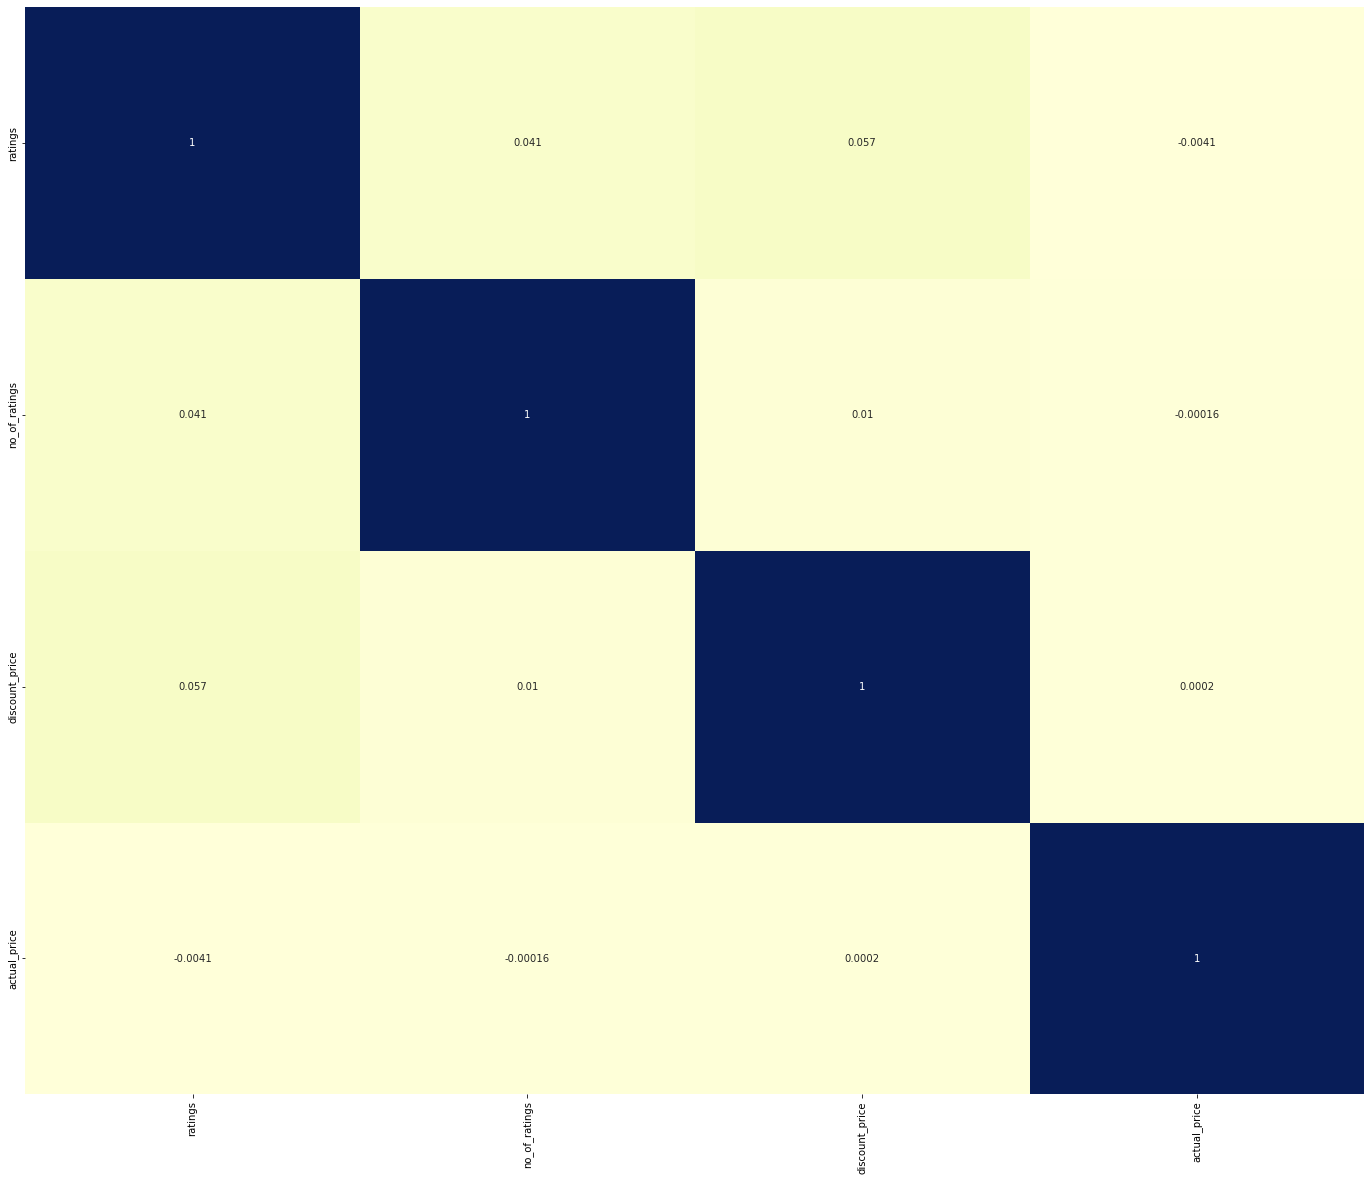

In [75]:
ax = sns.heatmap(cor, annot = True, cmap="YlGnBu", cbar=False)
plt.setp(ax.axes.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize']=(24,20)

In [76]:
import numpy as np

def create_new_column(data, ratings_threshold=3.5):
  """
  Creates a new column based on a threshold value in the 'ratings' column.

  Args:
    data: A NumPy array.
    ratings_threshold: The threshold value for the ratings column.

  Returns:
    A NumPy array with the new column.
  """

  customer_decision = np.where(data['ratings'] >= ratings_threshold, 1, 0)
  return customer_decision

def main():
  data = np.random.randint(0, 10, (100, 1))
  data = np.hstack((data, np.random.uniform(0, 5, (100, 1))))  # Adding a 'ratings' column
  new_column = create_new_column(data, ratings_threshold=3.5)
  print(new_column)



In [77]:
data.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,34490.0,67790.0


In [78]:
data.info

<bound method DataFrame.info of                                                      name     main_category  \
0       Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...        appliances   
1       LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...        appliances   
2       LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...        appliances   
3       LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...        appliances   
4       Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...        appliances   
...                                                   ...               ...   
551579  BE SAVAGE Pink I Purple You Hoodie Suitable fo...  sports & fitness   
551580                Adidas Regular Fit Men's Track Tops  sports & fitness   
551581          Redwolf Noice Toit Smort - Hoodie (Black)  sports & fitness   
551582     Redwolf Schrute Farms B&B - Hoodie (Navy Blue)  sports & fitness   
551584  Mothercare Printed Cotton Elastane Girls Infan...  sports & fitness   

            sub_cat

In [79]:

def customer_decision(ratings):
  if ratings >= 3.5:
    return 1
  else:
    return 0

# Create a new column called "customer decision"
customer_decisions = np.vectorize(customer_decision)(data['ratings'])

# Add the new column to the dataset
data['customer decision'] = customer_decisions

# Print the first few rows of the dataset
print(data.head())

                                                name main_category  \
0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...    appliances   
1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...    appliances   
2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...    appliances   
3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...    appliances   
4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...    appliances   

       sub_category  ratings  no_of_ratings  discount_price  actual_price  \
0  Air Conditioners      4.2         2255.0         32999.0       58990.0   
1  Air Conditioners      4.2         2948.0         46490.0       75990.0   
2  Air Conditioners      4.2         1206.0         34490.0       61990.0   
3  Air Conditioners      4.0           69.0         37990.0       68990.0   
4  Air Conditioners      4.1          630.0         34490.0       67790.0   

   customer decision  
0                  1  
1                  1  
2                  1  
3                  1  
4

C:\Users\Samuel\anaconda3\lib\site-packages\numpy\lib\function_base.py:2246: RuntimeWarning: invalid value encountered in customer_decision (vectorized)
  outputs = ufunc(*inputs)


In [80]:
data.head()


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,customer decision
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0,1
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0,1
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,34490.0,61990.0,1
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,37990.0,68990.0,1
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,34490.0,67790.0,1


In [81]:
data.tail()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,customer decision
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,4.6,6.0,711.0,999.0,1
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9.0,3449.0,4599.0,0
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2.0,1199.0,1999.0,0
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1.0,1199.0,1999.0,1
551584,Mothercare Printed Cotton Elastane Girls Infan...,sports & fitness,Yoga,4.6,5.0,1039.0,1299.0,1


In [82]:
#label encoding
cat_features = ['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'customer decision']
for cat_feature in cat_features:
    data[f'{cat_feature}_cat'] = data[cat_feature].astype('category')
    data[f'{cat_feature}_cat'] = data[f'{cat_feature}_cat'].cat.codes

In [83]:
data.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,customer decision,name_cat,main_category_cat,sub_category_cat,ratings_cat,no_of_ratings_cat,discount_price_cat,actual_price_cat,customer decision_cat
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0,1,119934,1,0,32,2241,15768,8742,1
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0,1,112870,1,0,32,2881,16143,8963,1
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,34490.0,61990.0,1,112846,1,0,32,1205,15812,8802,1
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,37990.0,68990.0,1,112853,1,0,30,68,15936,8882,1
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,34490.0,67790.0,1,43807,1,0,31,629,15812,8866,1


In [84]:
# Drop the redundant features since label encoding has been done
data.drop( ['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'customer decision'], axis = 1, inplace=True)
data.head(2)

,name_cat,main_category_cat,sub_category_cat,ratings_cat,no_of_ratings_cat,discount_price_cat,actual_price_cat,customer decision_cat
0,119934,1,0,32,2241,15768,8742,1
1,112870,1,0,32,2881,16143,8963,1


In [85]:
cor = data.corr()
cor

,name_cat,main_category_cat,sub_category_cat,ratings_cat,no_of_ratings_cat,discount_price_cat,actual_price_cat,customer decision_cat
name_cat,1.000000,0.004803,0.001963,0.003943,0.007507,-0.006677,0.002866,0.004922
main_category_cat,0.004803,1.000000,0.092701,-0.018070,0.097971,-0.059169,-0.055897,-0.018512
sub_category_cat,0.001963,0.092701,1.000000,-0.079304,-0.164244,0.014464,-0.010596,-0.088317
ratings_cat,0.003943,-0.018070,-0.079304,1.000000,0.114006,0.028725,0.011974,0.743481
no_of_ratings_cat,0.007507,0.097971,-0.164244,0.114006,1.000000,0.063164,0.063822,0.151334
discount_price_cat,-0.006677,-0.059169,0.014464,0.028725,0.063164,1.000000,0.903323,0.032471
actual_price_cat,0.002866,-0.055897,-0.010596,0.011974,0.063822,0.903323,1.000000,0.015066
customer decision_cat,0.004922,-0.018512,-0.088317,0.743481,0.151334,0.032471,0.015066,1.000000


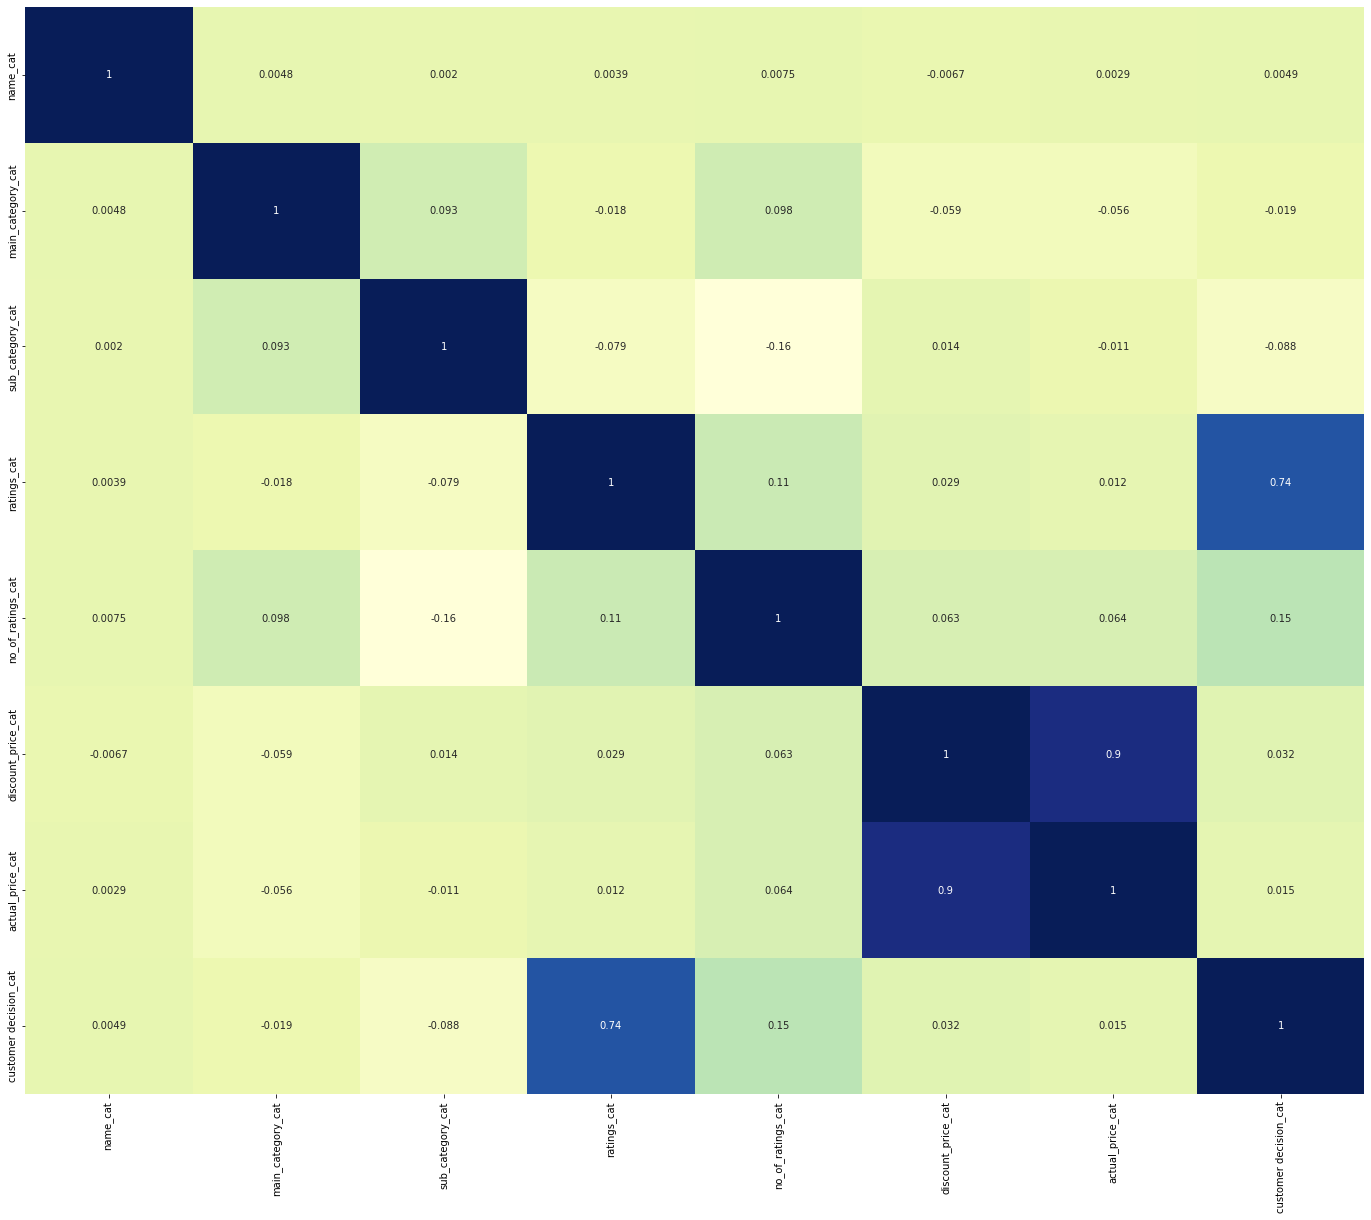

In [86]:
ax = sns.heatmap(cor, annot = True, cmap="YlGnBu", cbar=False)
plt.setp(ax.axes.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize']=(24,20)

In [87]:
X = data.drop(['customer decision_cat', 'ratings_cat'], axis = 'columns')
y = data['customer decision_cat']


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

In [89]:
target_names = ['leave', 'Stay']

In [90]:
Rfc = RandomForestClassifier(n_estimators=100)
Rfc.fit(X_train, y_train)
y_pred = Rfc.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
Rfc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', Rfc_accuracy)
AUC_ROC_Rfc = roc_auc_score(y_test, y_pred)
print('AUC-ROC:', AUC_ROC_Rfc)

              precision    recall  f1-score   support

       leave       0.62      0.34      0.44     16436
        Stay       0.82      0.93      0.87     51700

    accuracy                           0.79     68136
   macro avg       0.72      0.64      0.66     68136
weighted avg       0.77      0.79      0.77     68136

Accuracy: 0.7899935423271105
AUC-ROC: 0.6370187417062984


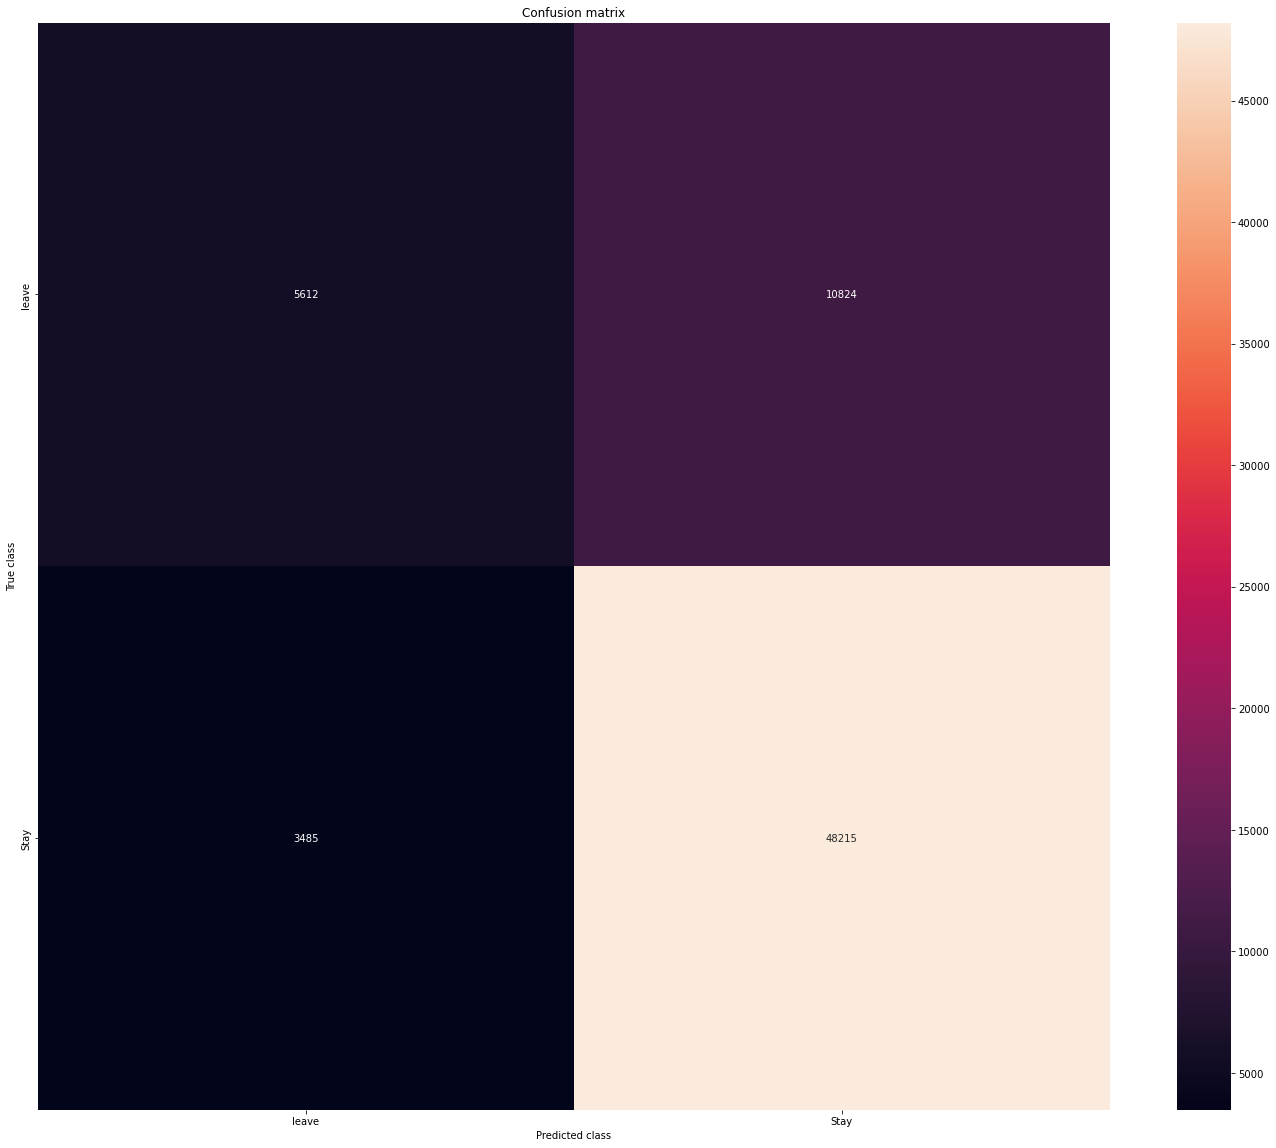

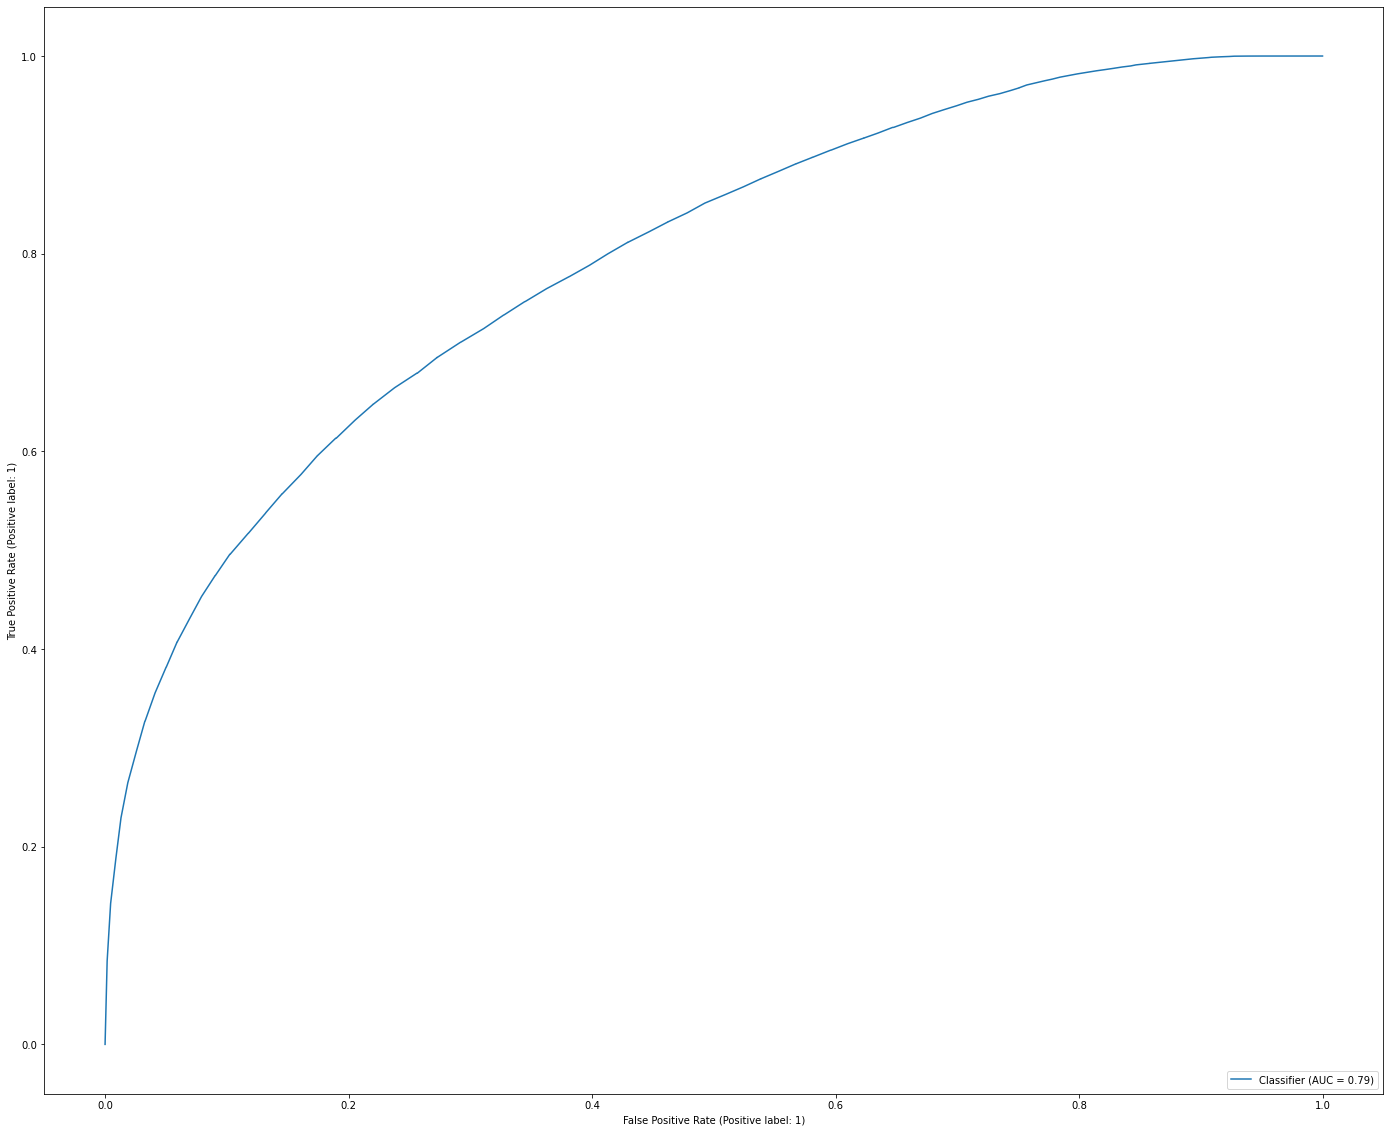

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, xticklabels = target_names,
            yticklabels = target_names, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

RocCurveDisplay.from_predictions(y_test, Rfc.predict_proba(X_test)[:, 1])


In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
LogReg_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', LogReg_accuracy)
AUC_ROC_LogReg = roc_auc_score(y_test, y_pred)
print('AUC-ROC:', AUC_ROC_LogReg)

              precision    recall  f1-score   support

       leave       0.32      0.00      0.00     16436
        Stay       0.76      1.00      0.86     51700

    accuracy                           0.76     68136
   macro avg       0.54      0.50      0.43     68136
weighted avg       0.65      0.76      0.65     68136

Accuracy: 0.7586444757543737
AUC-ROC: 0.5000789581580839


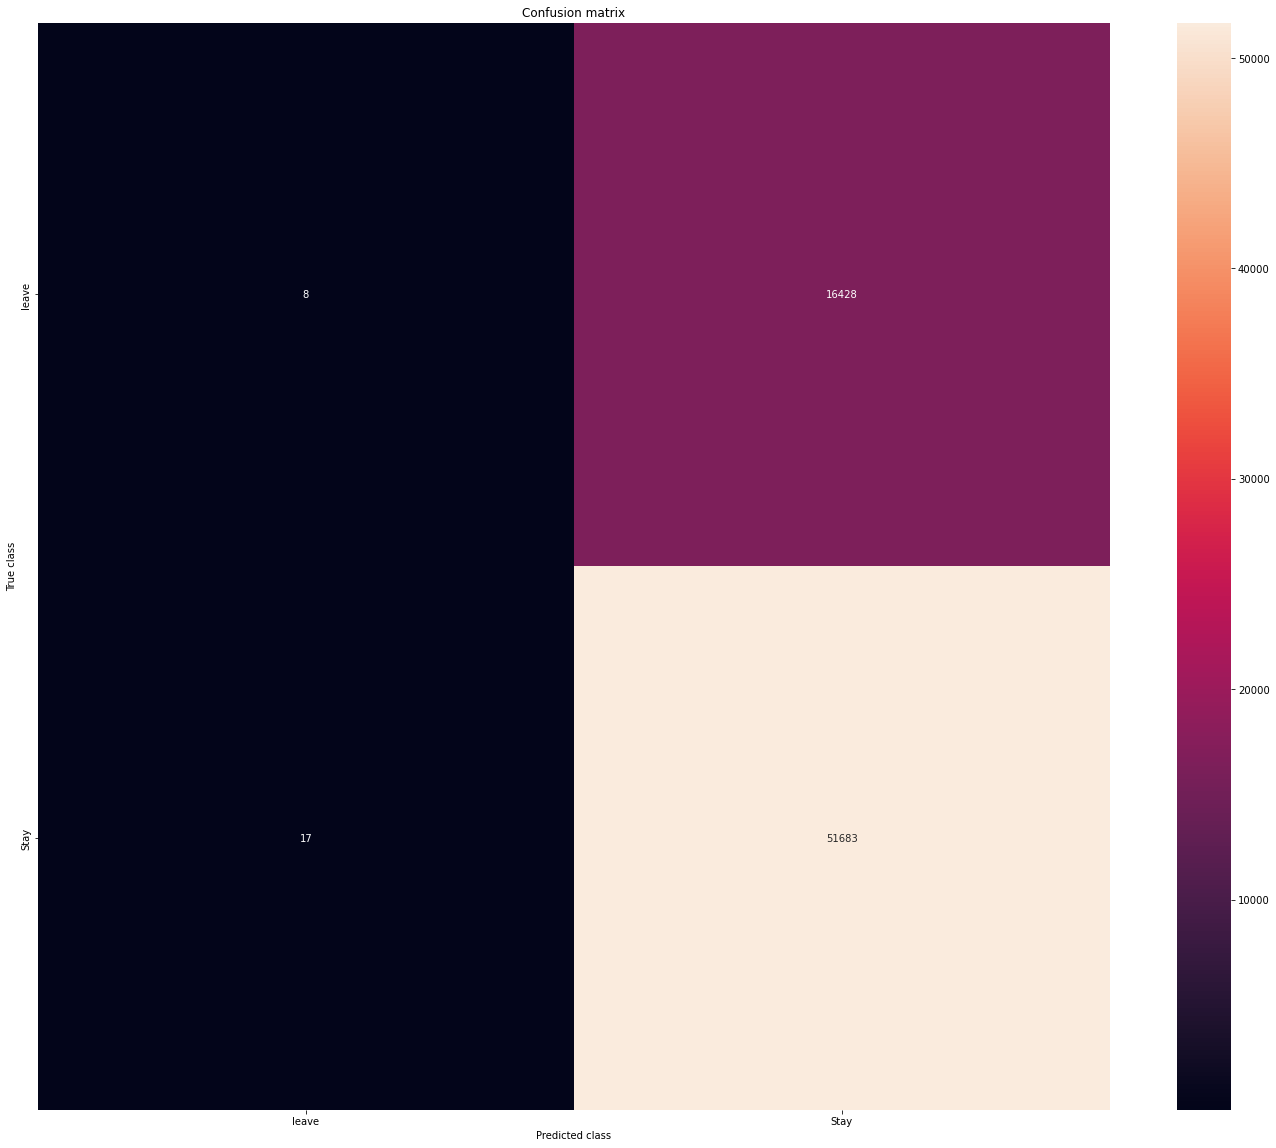

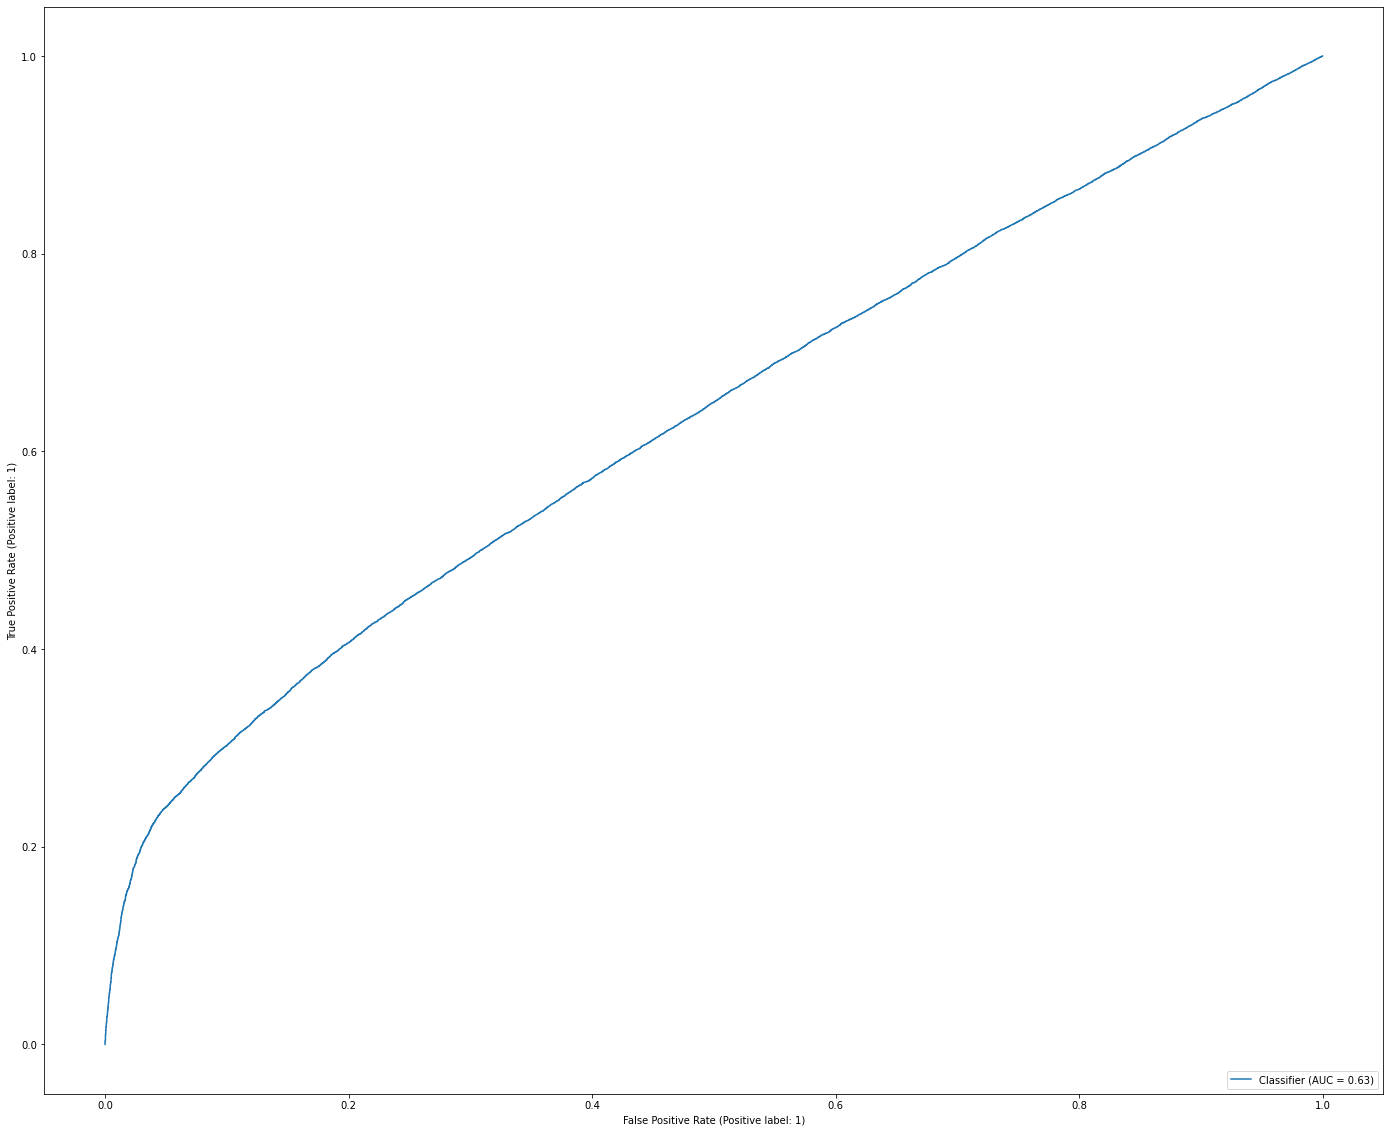

In [94]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, xticklabels = target_names,
            yticklabels = target_names, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

RocCurveDisplay.from_predictions(y_test, LogReg.predict_proba(X_test)[:, 1])


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtc = DecisionTreeClassifier()  # You can set hyperparameters here if needed.
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
dtc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', dtc_accuracy)
AUC_ROC_dtc = roc_auc_score(y_test, y_pred)
print('AUC-ROC:', AUC_ROC_dtc)

              precision    recall  f1-score   support

       leave       0.47      0.49      0.48     16436
        Stay       0.84      0.83      0.83     51700

    accuracy                           0.75     68136
   macro avg       0.65      0.66      0.66     68136
weighted avg       0.75      0.75      0.75     68136

Accuracy: 0.7455383350945168
AUC-ROC: 0.6581053666692871


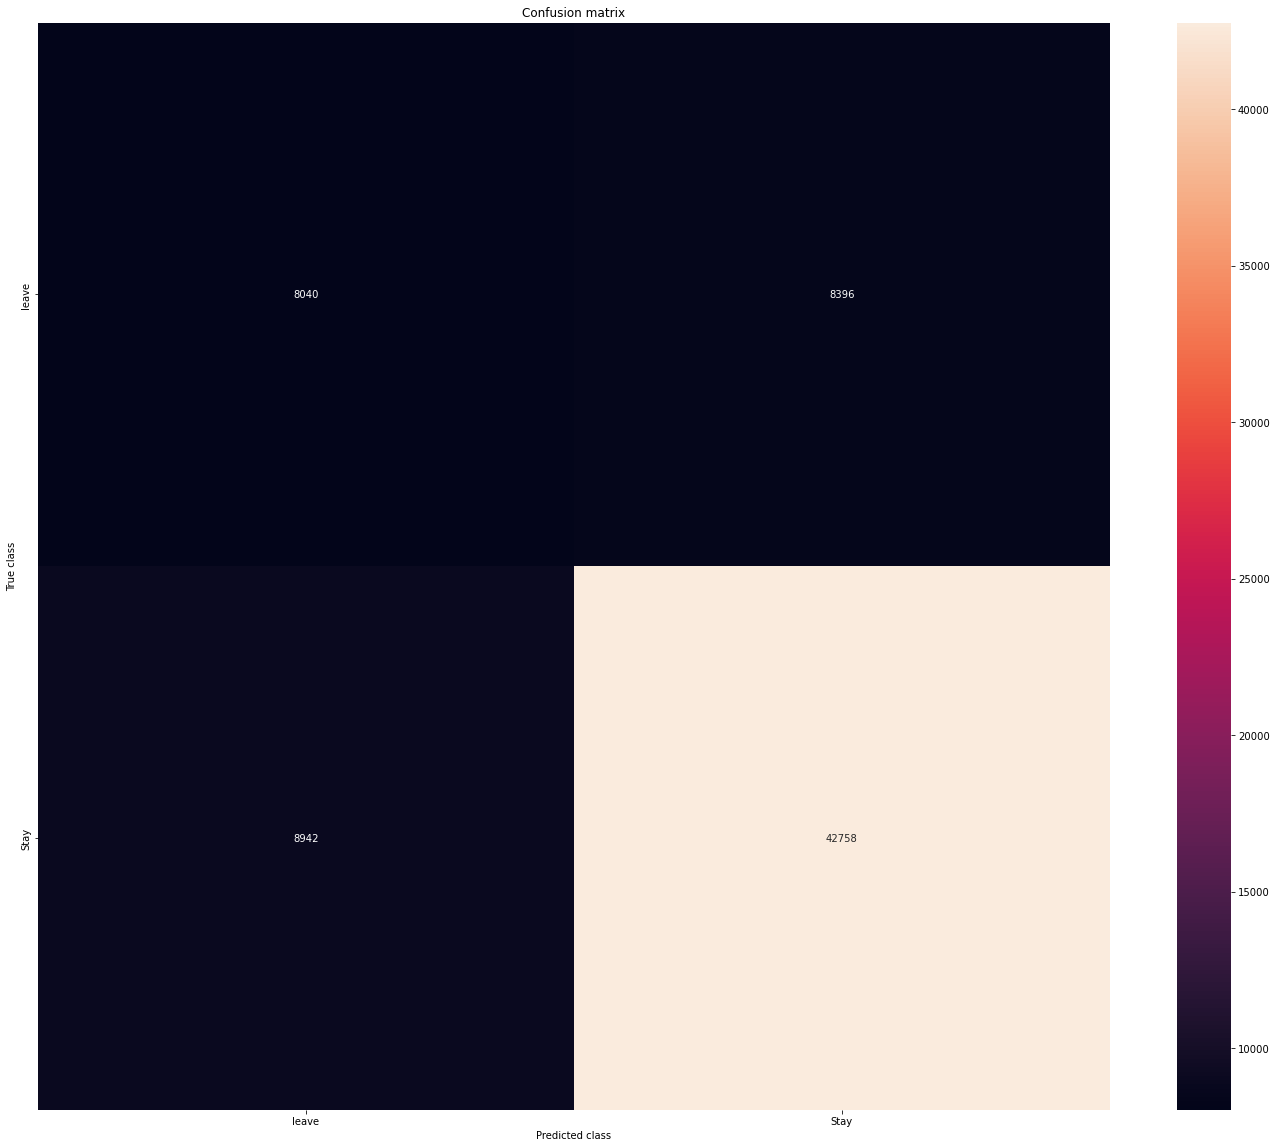

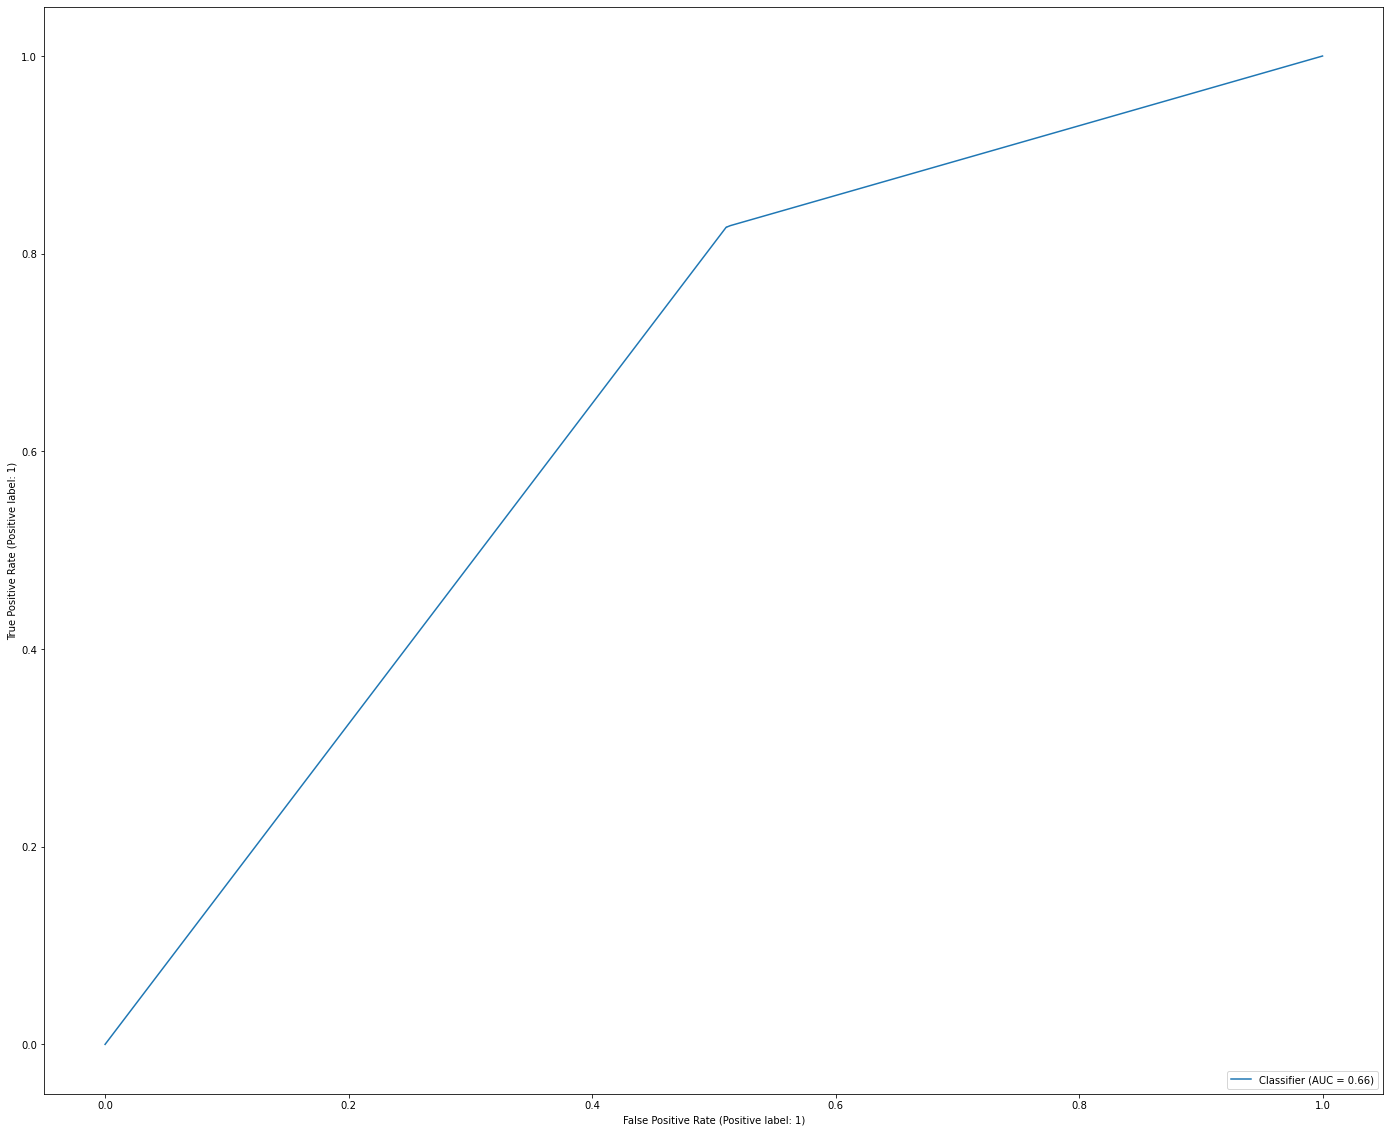

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, xticklabels = target_names,
            yticklabels = target_names, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

RocCurveDisplay.from_predictions(y_test, dtc.predict_proba(X_test)[:, 1])


In [98]:
from xgboost import XGBClassifier

In [99]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
xgb_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy', xgb_accuracy)
AUC_ROC_xgb = roc_auc_score(y_test, y_pred)
print('AUC-ROC:', AUC_ROC_xgb)

              precision    recall  f1-score   support

       leave       0.71      0.19      0.29     16436
        Stay       0.79      0.98      0.87     51700

    accuracy                           0.79     68136
   macro avg       0.75      0.58      0.58     68136
weighted avg       0.77      0.79      0.73     68136

Accuracy 0.785062228484208
AUC-ROC: 0.5805873670712918


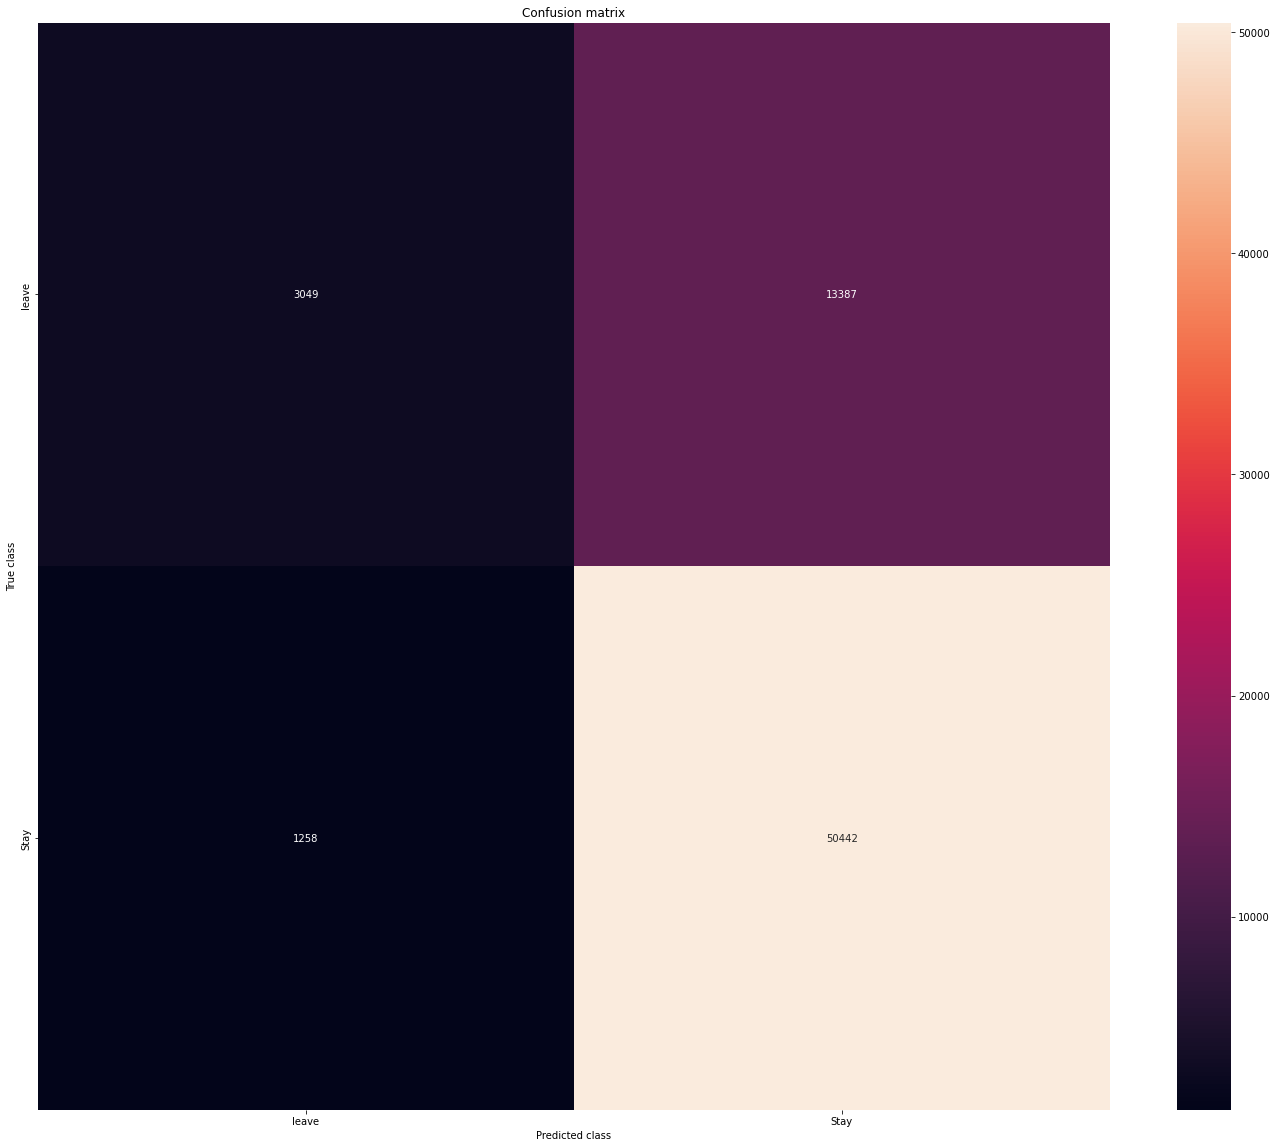

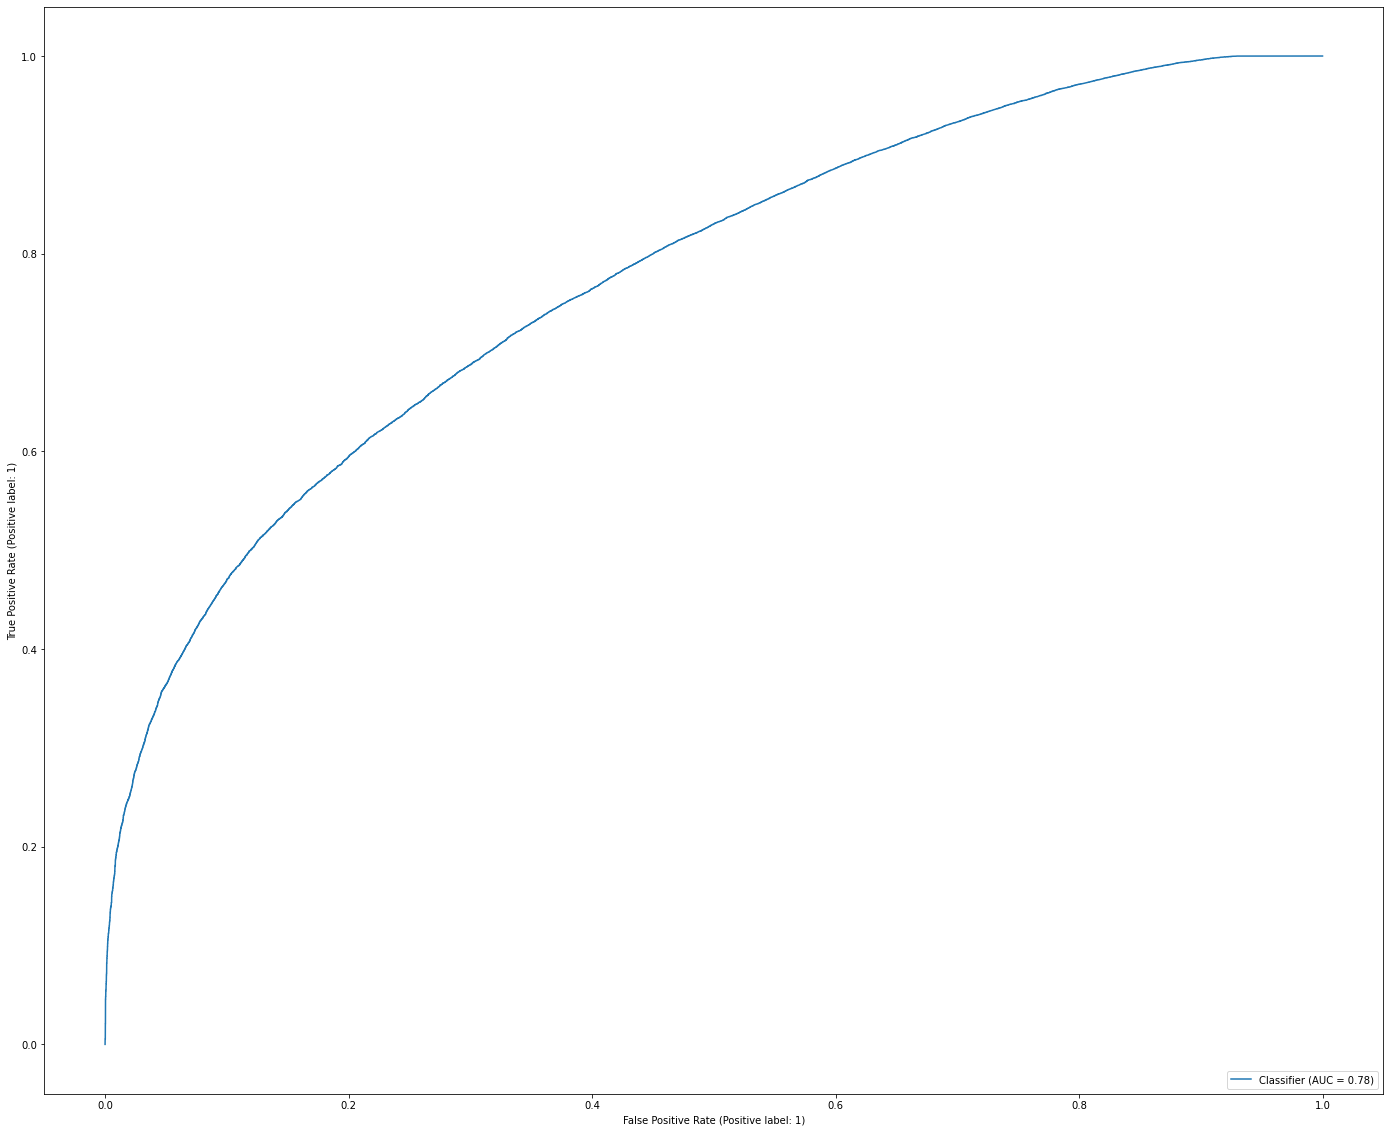

In [100]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, xticklabels = target_names,
            yticklabels = target_names, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

RocCurveDisplay.from_predictions(y_test, xgb.predict_proba(X_test)[:, 1])


In [104]:
!pip install lightgbm

In [105]:
 
import lightgbm as lgb

# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier



In [107]:
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
model_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy', model_accuracy)
AUC_ROC_model = roc_auc_score(y_test, y_pred)
print('AUC-ROC:', AUC_ROC_model)



[LightGBM] [Info] Number of positive: 207378, number of negative: 65166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the train set: 272544, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.760897 -> initscore=1.157605
[LightGBM] [Info] Start training from score 1.157605
              precision    recall  f1-score   support

       leave       0.73      0.15      0.25     16436
        Stay       0.78      0.98      0.87     51700

    accuracy                           0.78     68136
   macro avg       0.76      0.57      0.56     68136
weighted avg       0.77      0.78      0.72     68136

Accuracy 0.7821122460960432
AUC-ROC: 0.5674592923115885


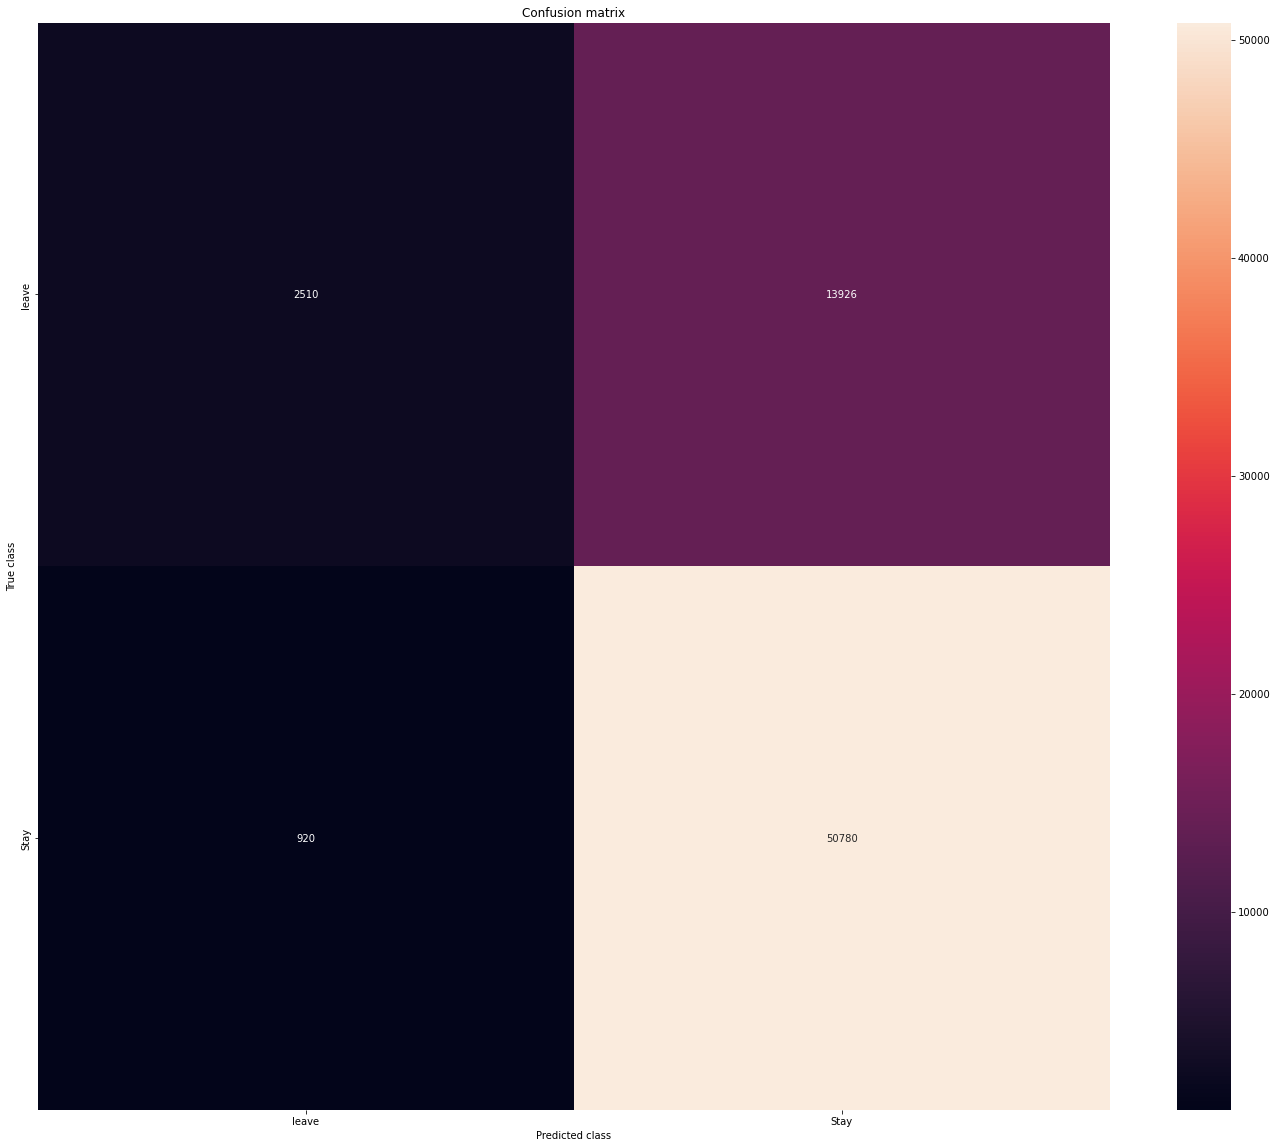

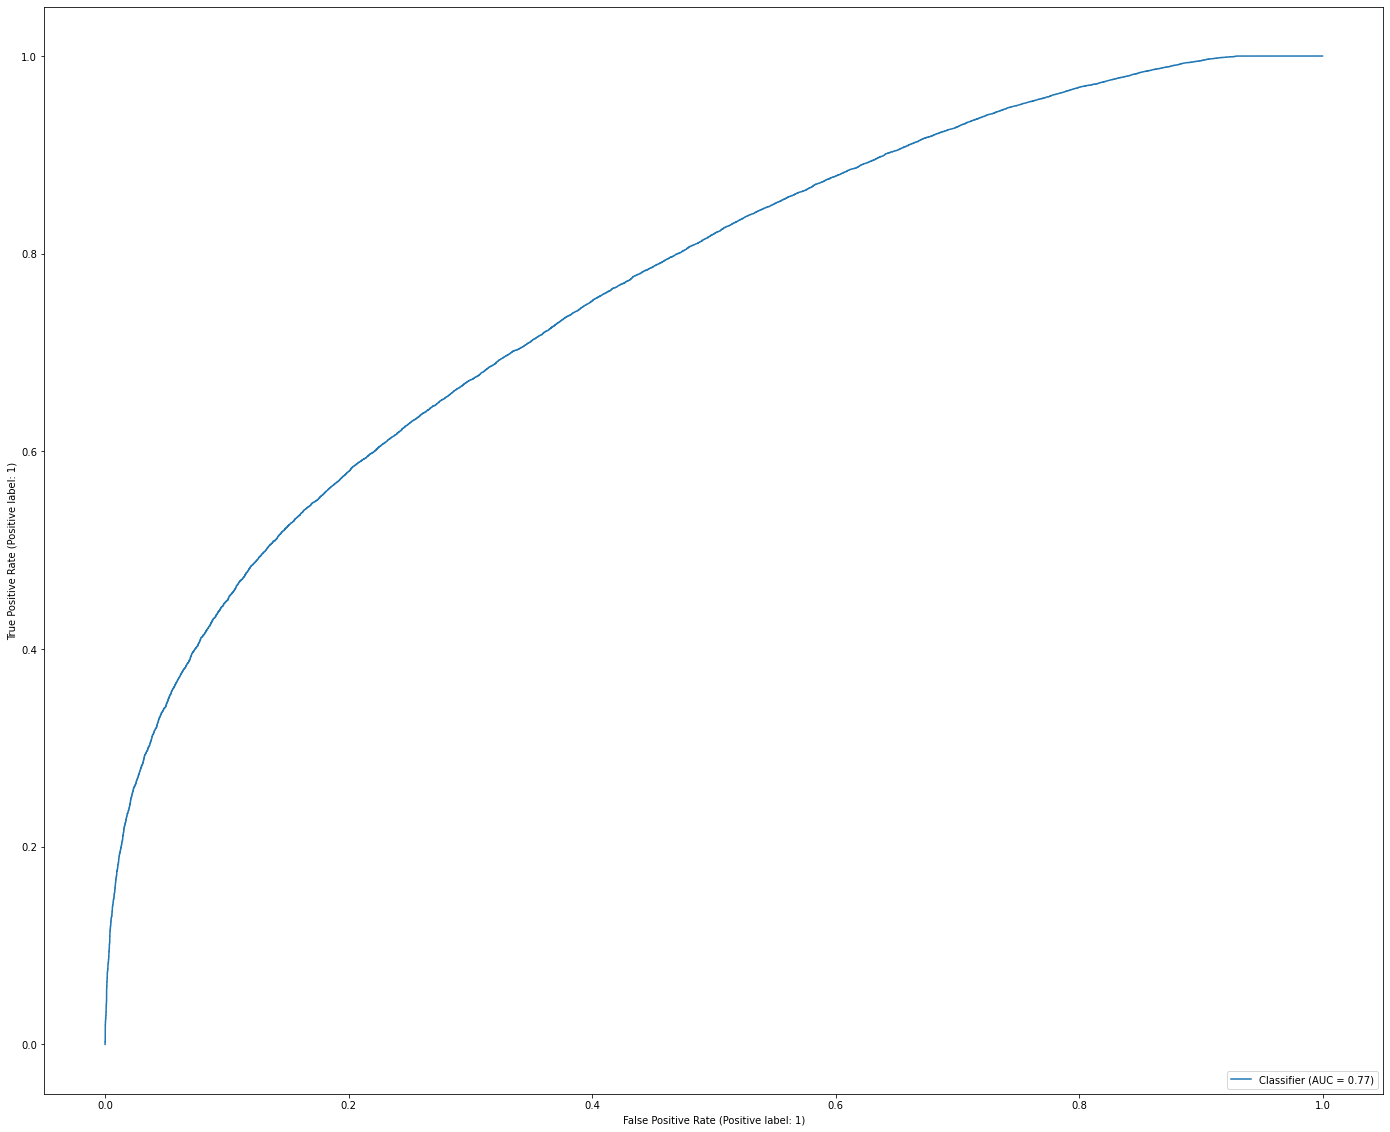

In [108]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, xticklabels = target_names,
            yticklabels = target_names, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test)[:, 1])

In [109]:
 
from catboost import CatBoostClassifier 
import warnings 
warnings.filterwarnings("ignore")


In [112]:

# Define the hyperparameters for the CatBoost algorithm 
params = {'learning_rate': 0.1, 'depth': 6, 'l2_leaf_reg': 3, 'iterations': 100} 

In [113]:
ctb = CatBoostClassifier(**params) 
ctb.fit(X_train, y_train)
y_pred = ctb.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
ctb_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy', ctb_accuracy)
AUC_ROC_ctb = roc_auc_score(y_test, y_pred)
print('AUC-ROC:', AUC_ROC_ctb)




0:	learn: 0.6585392	total: 168ms	remaining: 16.6s
1:	learn: 0.6305496	total: 188ms	remaining: 9.21s
2:	learn: 0.6071571	total: 210ms	remaining: 6.8s
3:	learn: 0.5876780	total: 235ms	remaining: 5.63s
4:	learn: 0.5714476	total: 259ms	remaining: 4.91s
5:	learn: 0.5576562	total: 283ms	remaining: 4.43s
6:	learn: 0.5457733	total: 307ms	remaining: 4.08s
7:	learn: 0.5359528	total: 333ms	remaining: 3.83s
8:	learn: 0.5274472	total: 358ms	remaining: 3.62s
9:	learn: 0.5202464	total: 389ms	remaining: 3.5s
10:	learn: 0.5143311	total: 422ms	remaining: 3.41s
11:	learn: 0.5086297	total: 448ms	remaining: 3.29s
12:	learn: 0.5039832	total: 476ms	remaining: 3.18s
13:	learn: 0.5001354	total: 501ms	remaining: 3.08s
14:	learn: 0.4967835	total: 529ms	remaining: 3s
15:	learn: 0.4937846	total: 554ms	remaining: 2.91s
16:	learn: 0.4912564	total: 580ms	remaining: 2.83s
17:	learn: 0.4889389	total: 649ms	remaining: 2.96s
18:	learn: 0.4868689	total: 677ms	remaining: 2.89s
19:	learn: 0.4849744	total: 704ms	remaining: 2

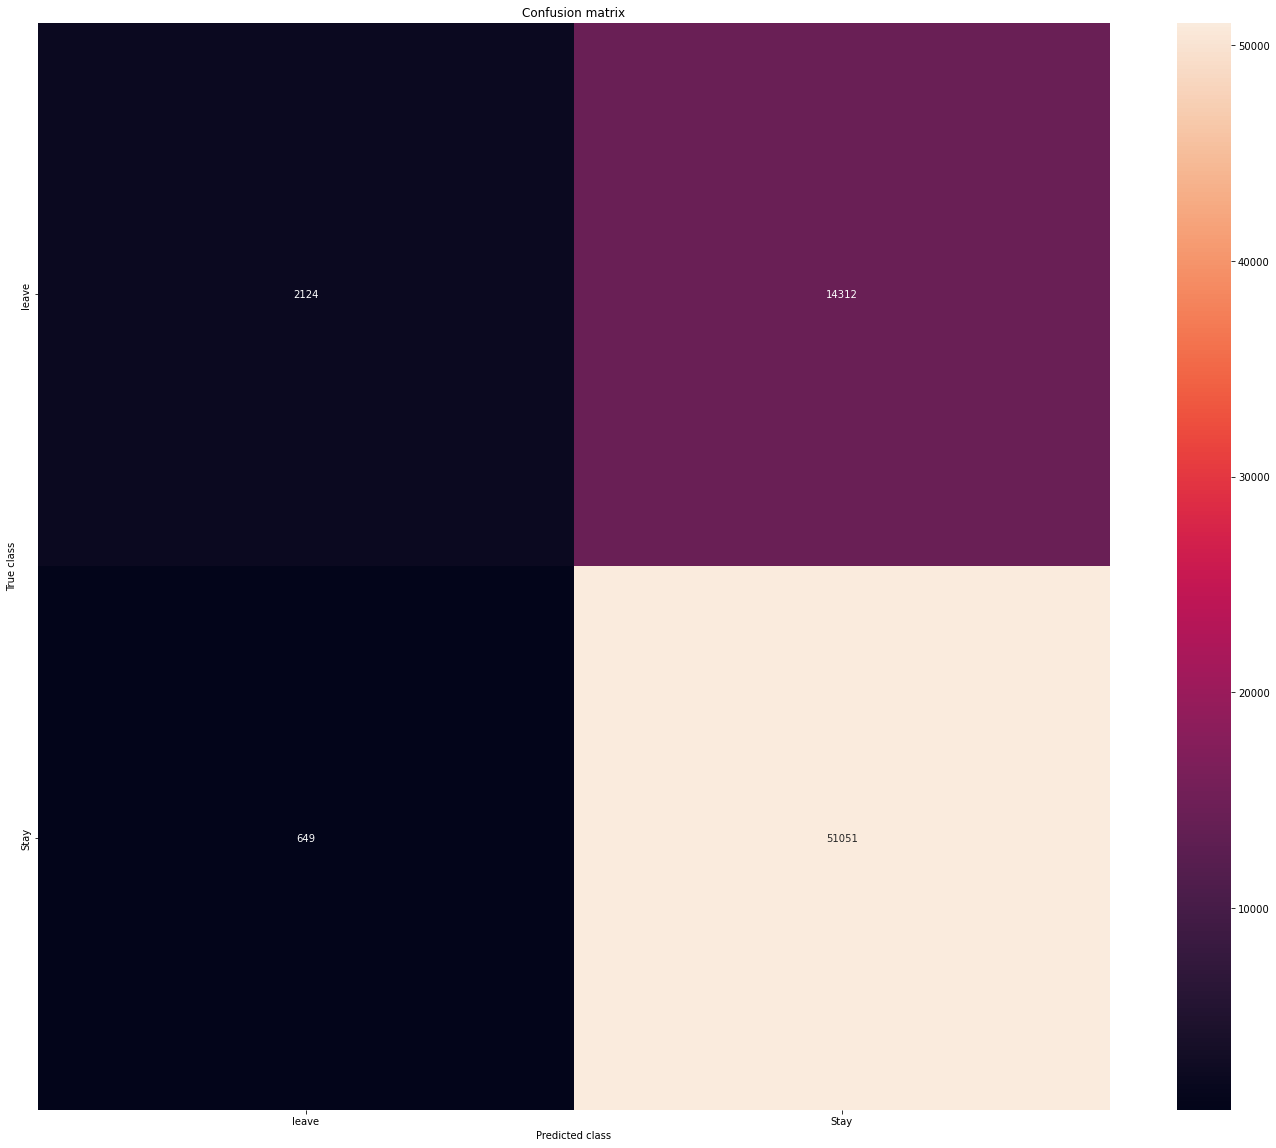

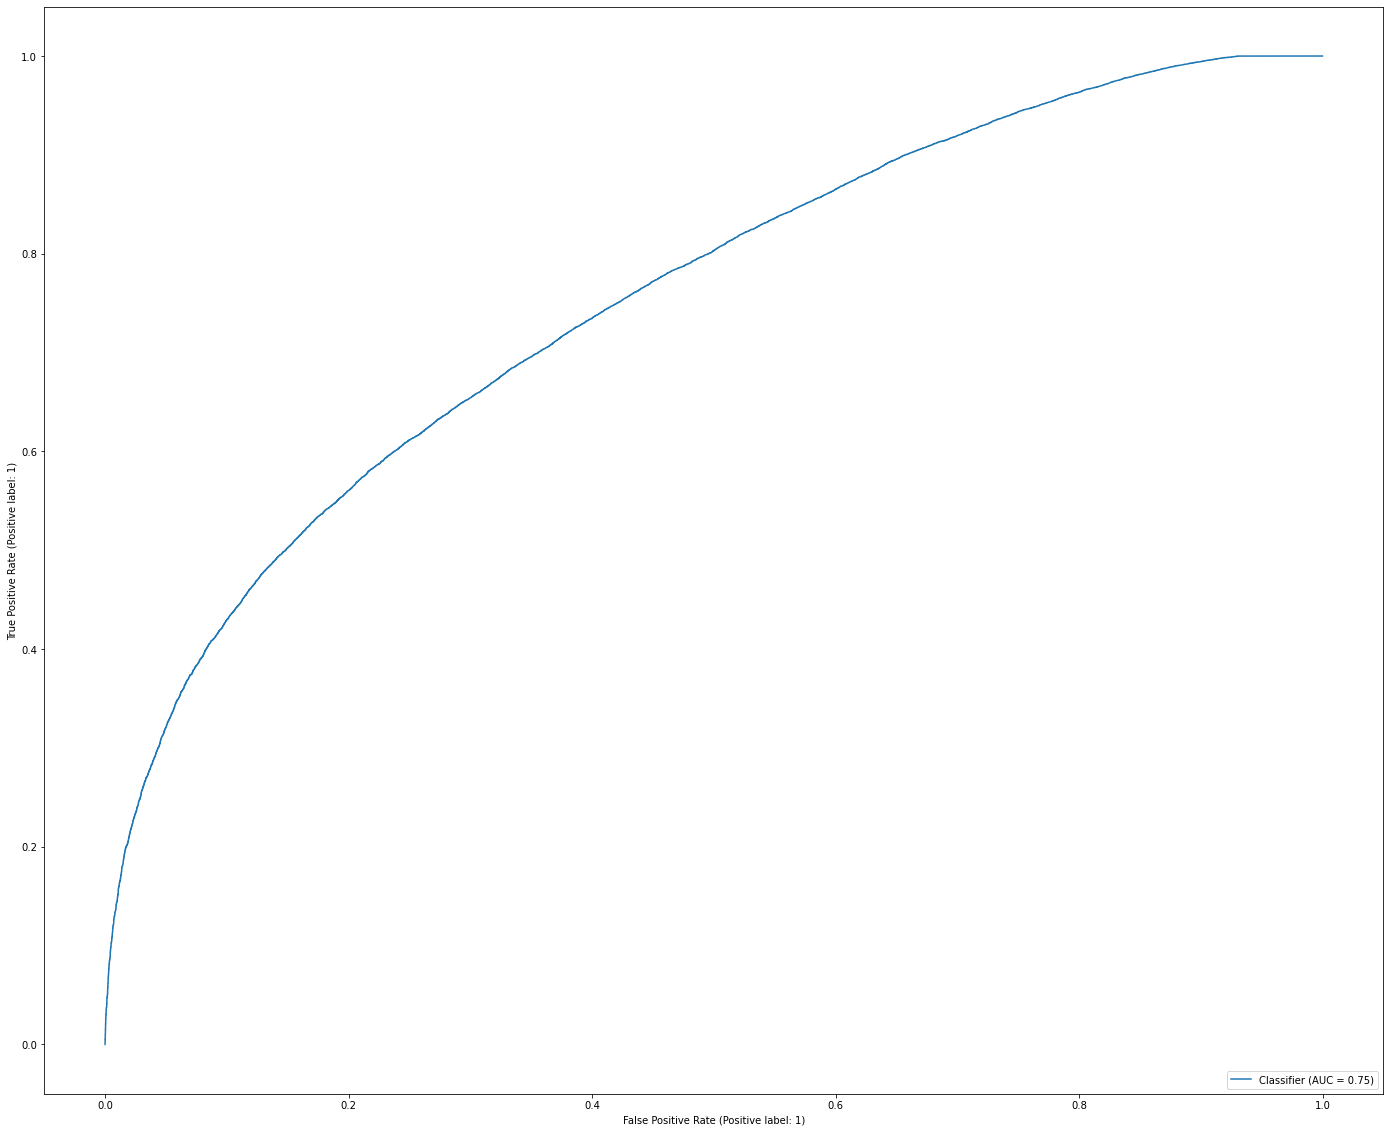

In [114]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, xticklabels = target_names,
            yticklabels = target_names, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

RocCurveDisplay.from_predictions(y_test, ctb.predict_proba(X_test)[:, 1])

In [115]:
# Calculate AUC for each classifier on the test set
classifiers = [model, Rfc, ctb, xgb]

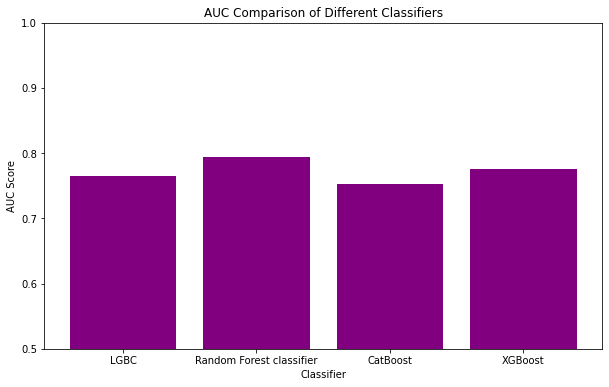

In [117]:

classifier_names = ['LGBC', 'Random Forest classifier', 'CatBoost', 'XGBoost']
auc_scores = []

for clf in classifiers:
    y_prob = clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

# Plot the AUC comparison
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, auc_scores, color='purple')
plt.xlabel('Classifier')
plt.ylabel('AUC Score')
plt.title('AUC Comparison of Different Classifiers')
plt.ylim(0.5, 1.0)
plt.show()

In [118]:
from sklearn.metrics import roc_curve

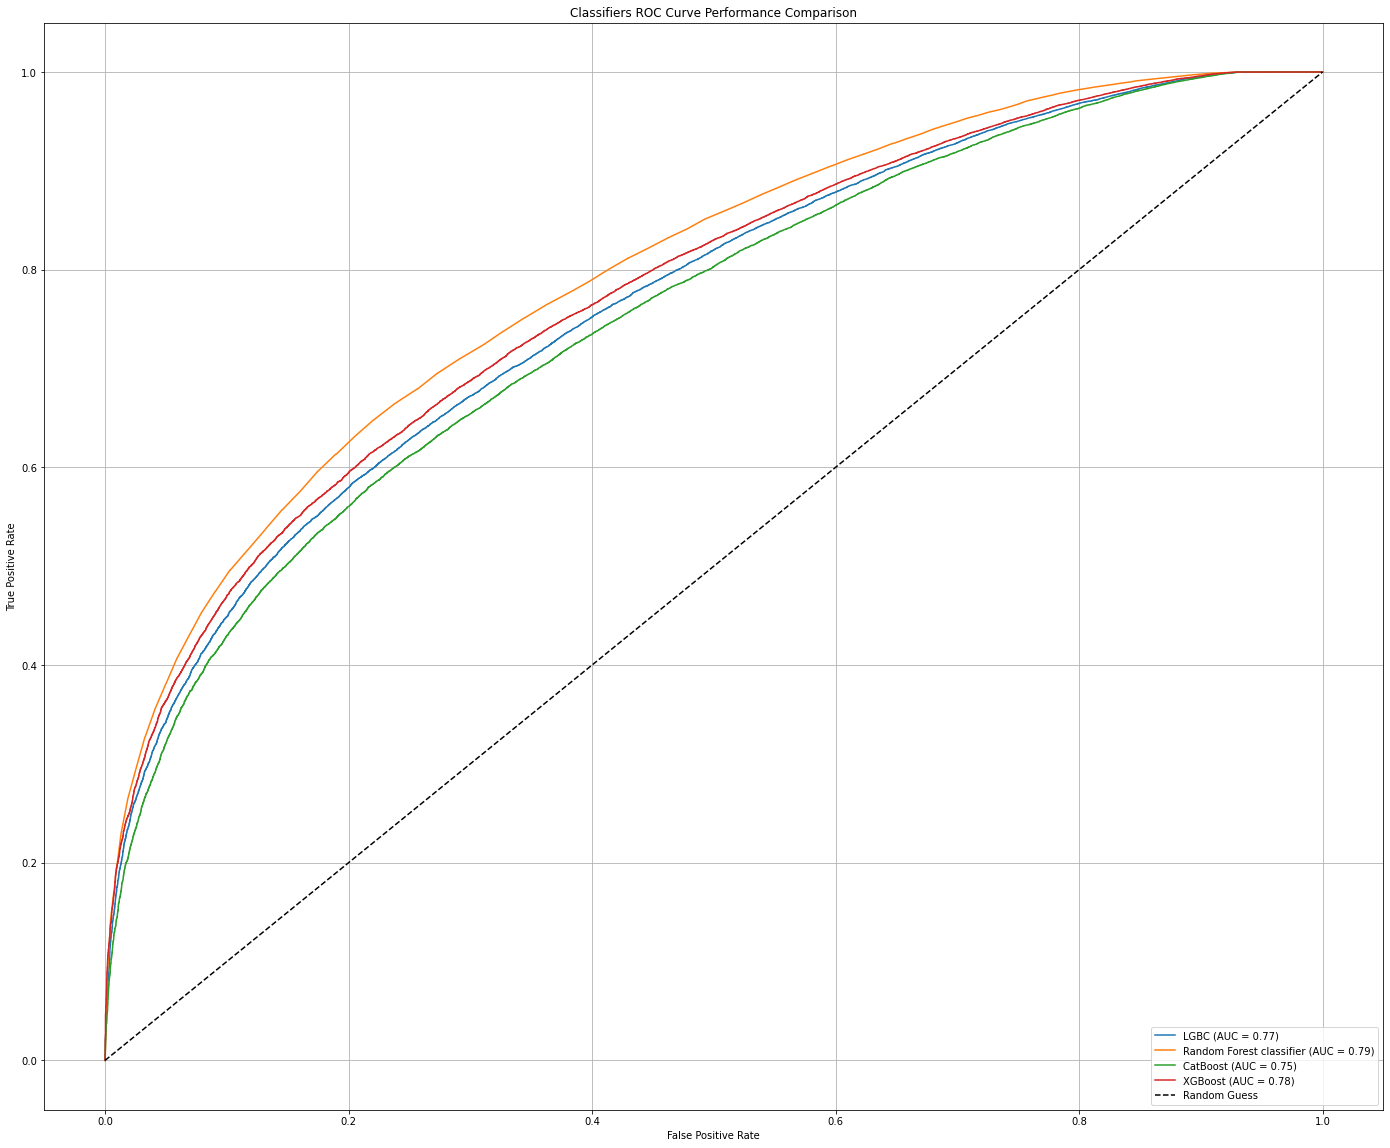

In [119]:

for clf, name in zip(classifiers, classifier_names):
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

#Plot the ROC curves and customize the plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC Curve Performance Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [120]:
# Calculate AUC for each classifier on the test set
classifiers = [Rfc, model, ctb, LogReg, dtc, xgb]

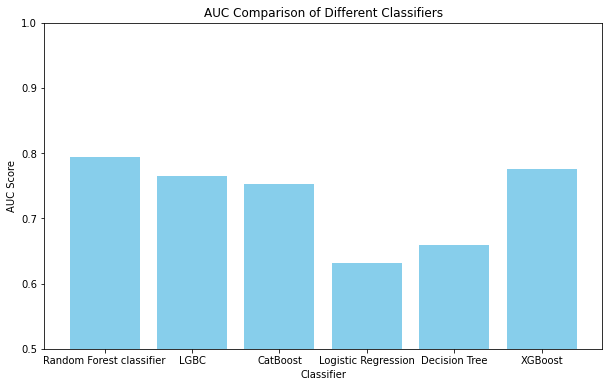

In [121]:

classifier_names = ['Random Forest classifier', 'LGBC', 'CatBoost', 'Logistic Regression', 'Decision Tree', 'XGBoost']
auc_scores = []

for clf in classifiers:
    y_prob = clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

# Plot the AUC comparison
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, auc_scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('AUC Score')
plt.title('AUC Comparison of Different Classifiers')
plt.ylim(0.5, 1.0)
plt.show()

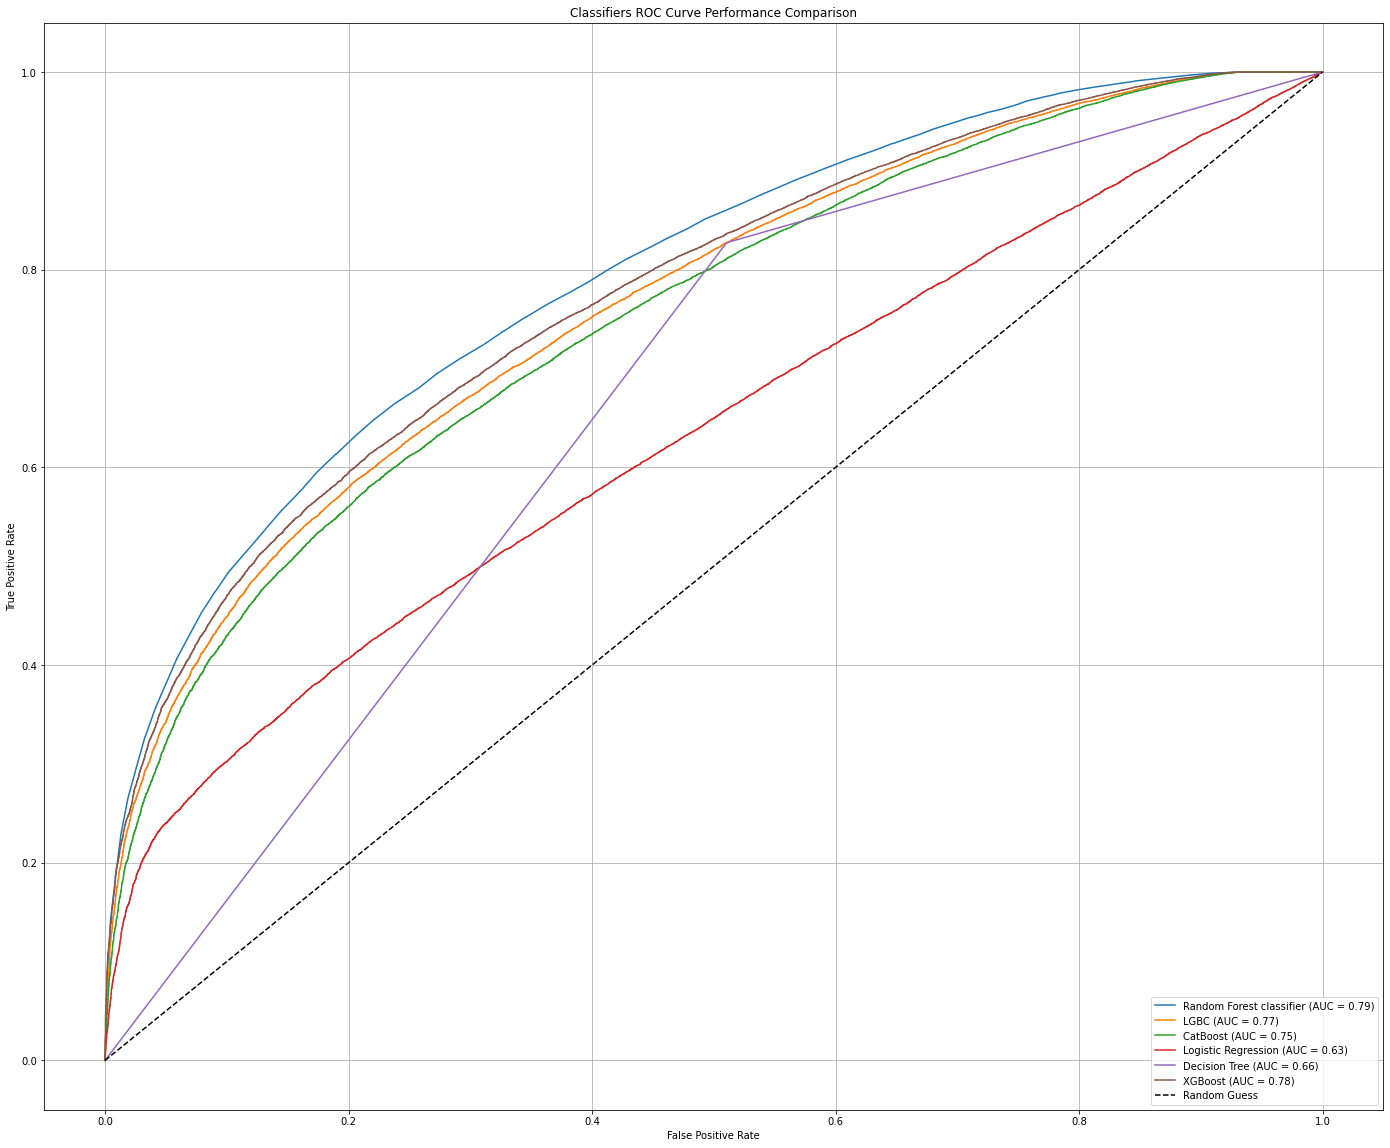

In [122]:

for clf, name in zip(classifiers, classifier_names):
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

#Plot the ROC curves and customize the plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC Curve Performance Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()